<h1>Data Preprocessing</h1>

<p>Get all processed files</p>

In [17]:
import pandas as pd
import glob

files = glob.glob("../data/processed.*.data")

dfs = [pd.read_csv(f , header=None , na_values='?') for f in files]

df = pd.concat(dfs , ignore_index=True)

<p>Assign column names (from heart-disease.names file)</p>

In [18]:
df.columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs",
    "restecg", "thalach", "exang", "oldpeak",
    "slope", "ca", "thal", "target"
]

<p>Convert target to binary (0 = healthy, 1 = disease)</p>

In [19]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

<p>Save merged dataset</p>

In [20]:
df.to_csv("../data/heart_disease.csv", index=False)

In [21]:
df.shape
df.info()
df.head()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  861 non-null    float64
 4   chol      890 non-null    float64
 5   fbs       830 non-null    float64
 6   restecg   918 non-null    float64
 7   thalach   865 non-null    float64
 8   exang     865 non-null    float64
 9   oldpeak   858 non-null    float64
 10  slope     611 non-null    float64
 11  ca        309 non-null    float64
 12  thal      434 non-null    float64
 13  target    920 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 100.8 KB


age           0
sex           0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

<p>Handle missing values</p>

In [22]:
from sklearn.impute import SimpleImputer

# drop "ca"
df = df.drop(columns=['ca'] , errors='ignore')

# seperate Numeric and Categorical columns
num_cols = ["age", "trestbps", "chol", "thalach", "oldpeak"]
cat_cols = ["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]

# Imputer for Numeric columns (median)
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Imputer for Categorical columns (most_frequent)
cat_imputer = SimpleImputer(strategy='most_frequent')
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])  

<p>Perform data encoding</p>

In [23]:
df = pd.get_dummies(df , columns=["cp", "restecg", "slope", "thal"], drop_first=True)

<p>Standardization for Numerical features</p>

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

<p>Explore Data Analysis (EDA)</p>

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns


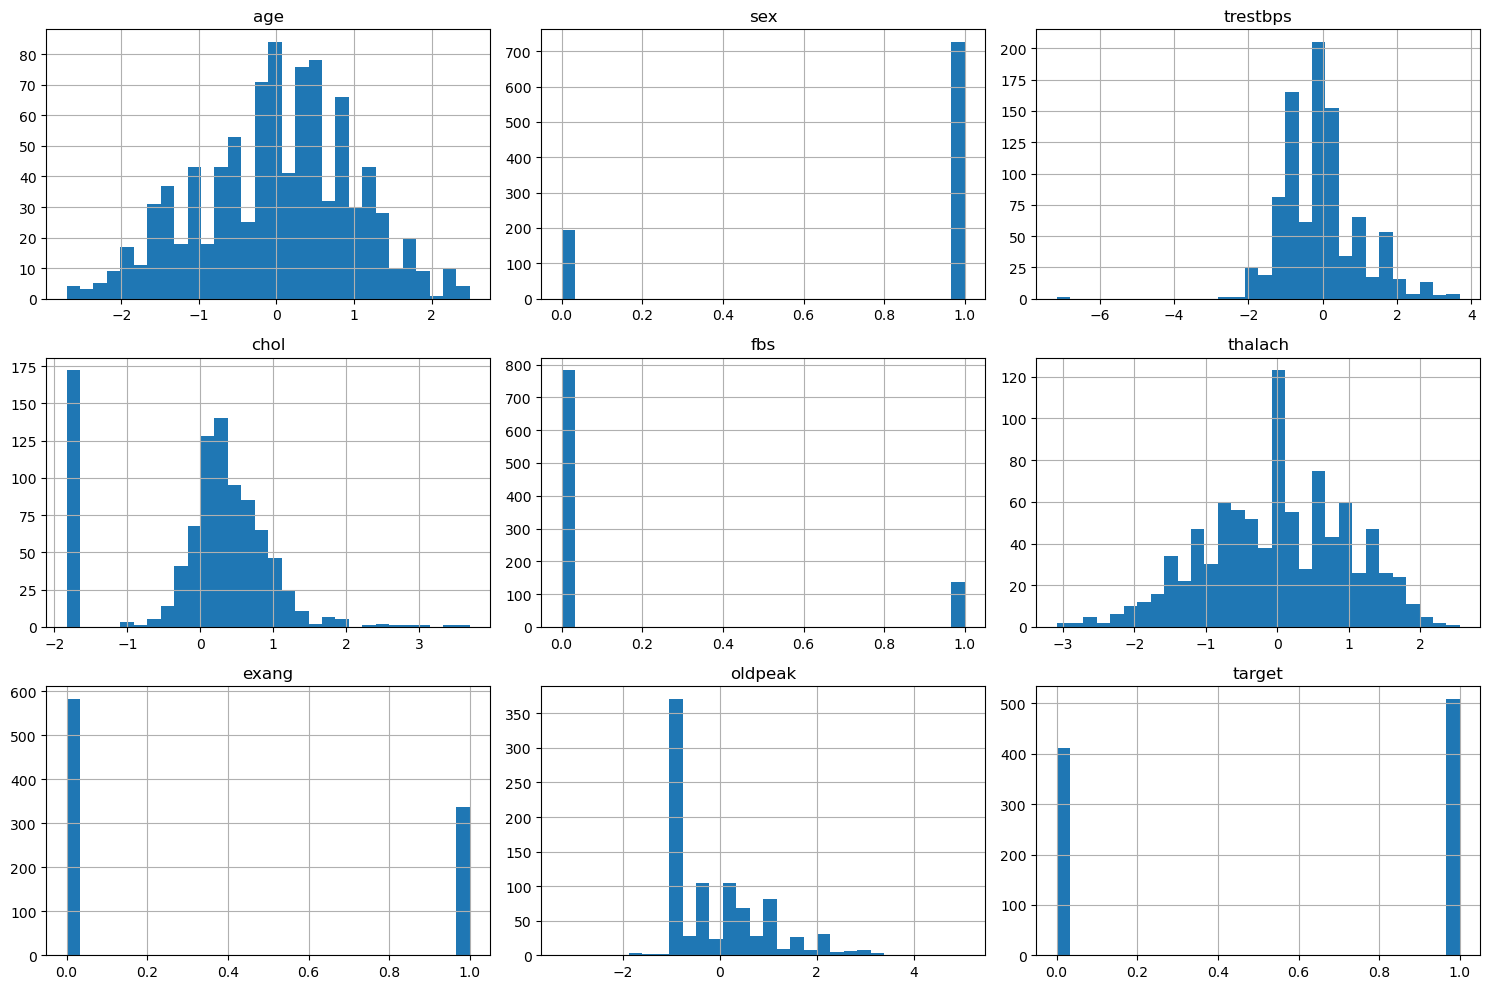

In [26]:
# Histogram 
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

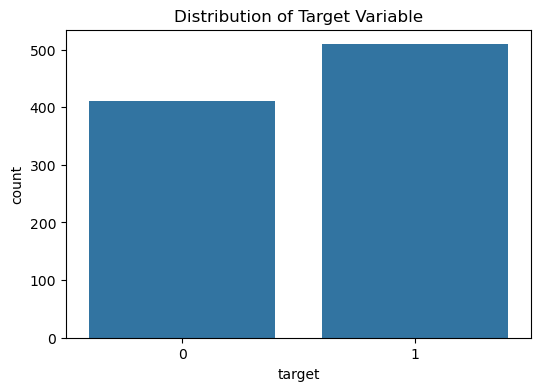

In [27]:
# Histogram for target variable
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

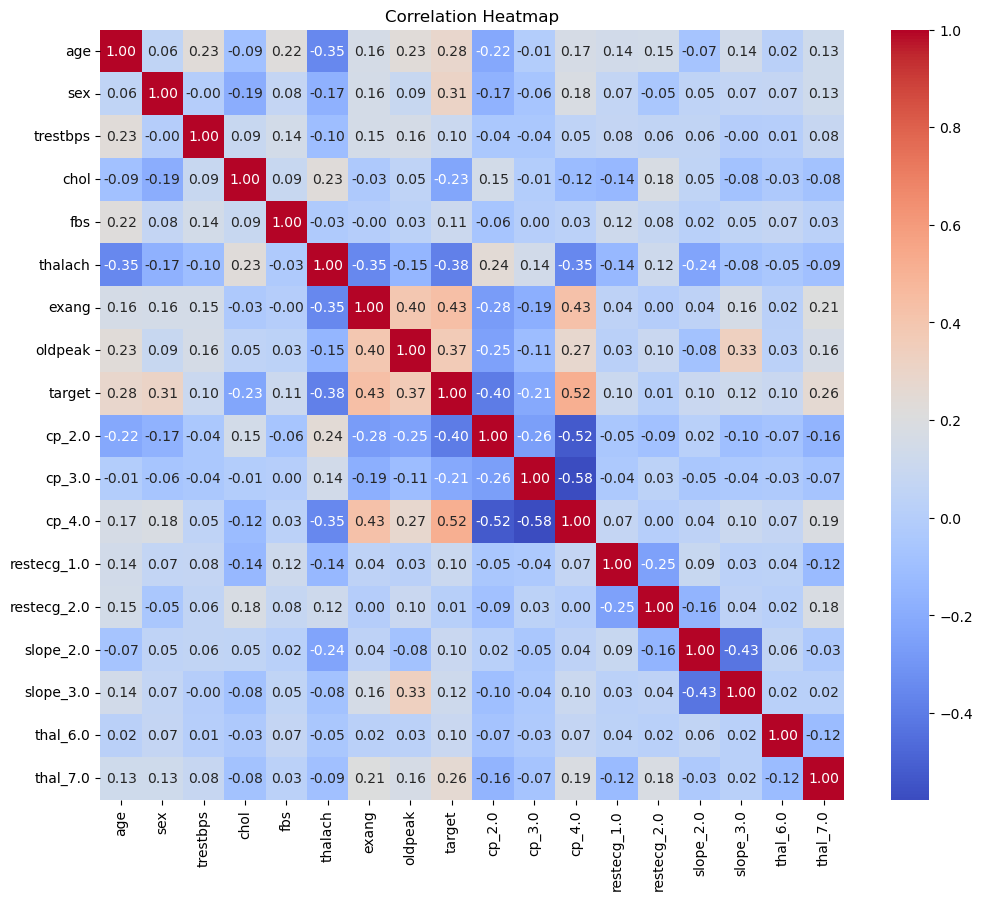

In [28]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

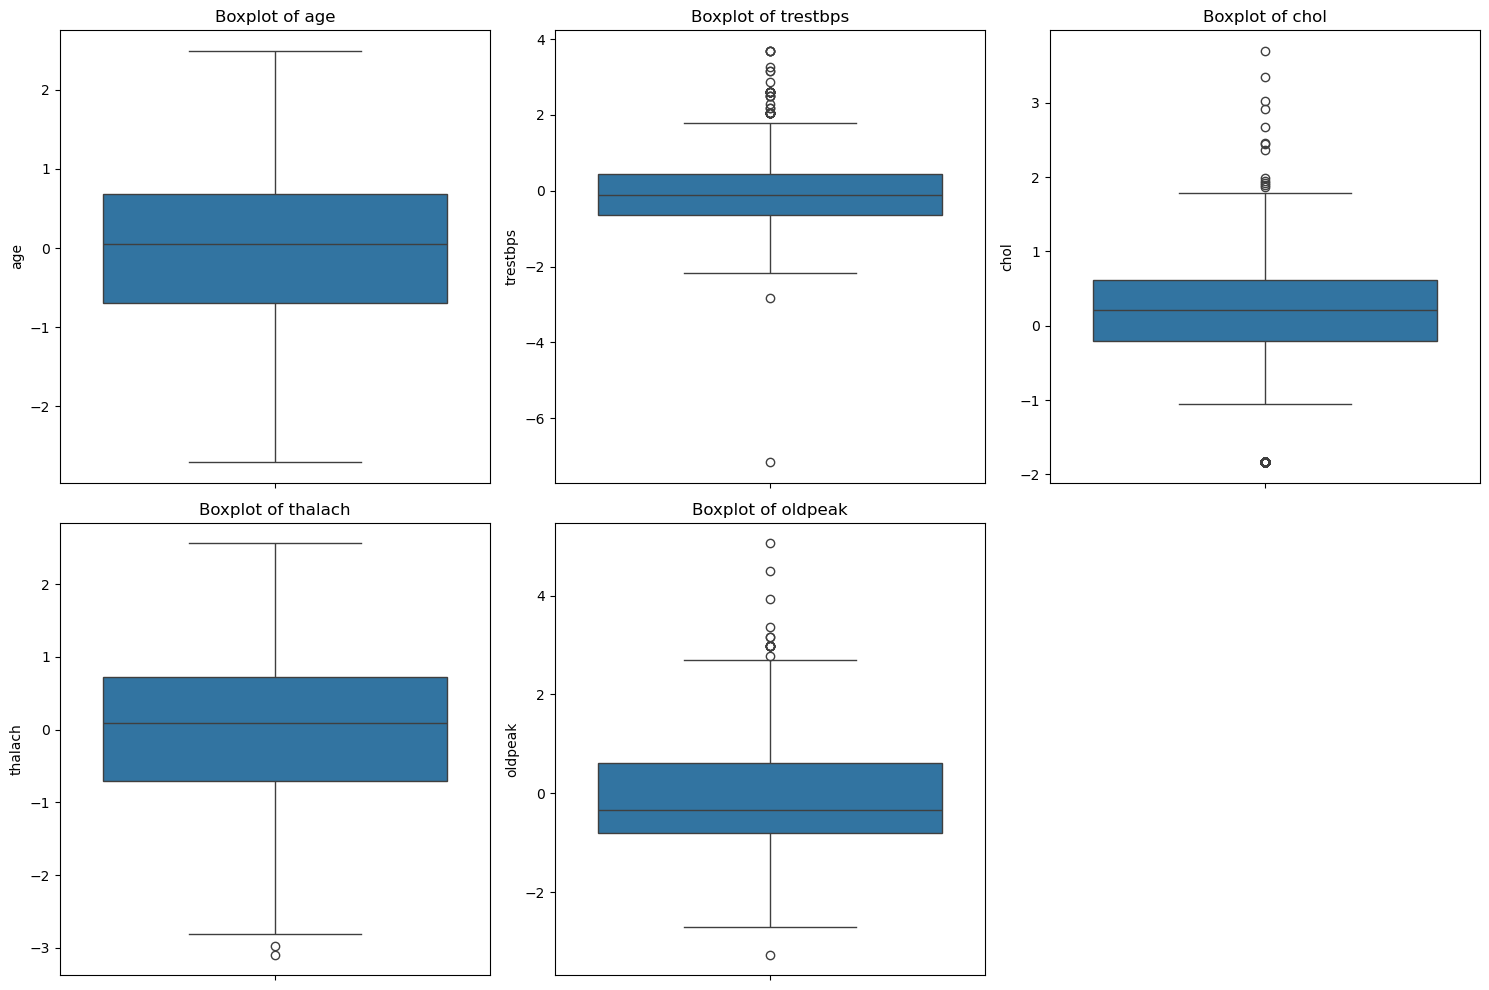

In [29]:
# Boxplot for numerical features
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

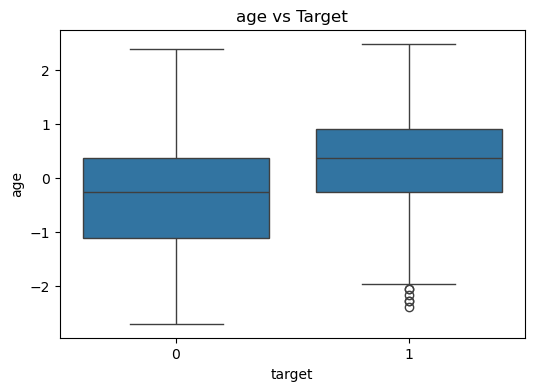

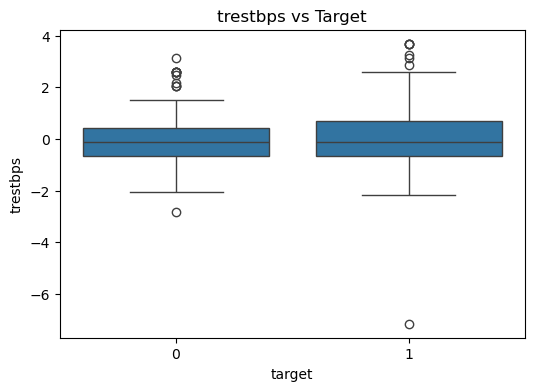

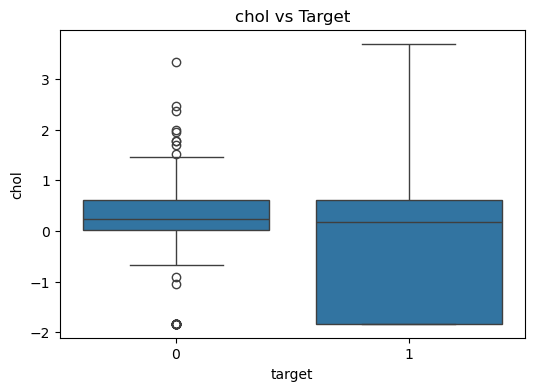

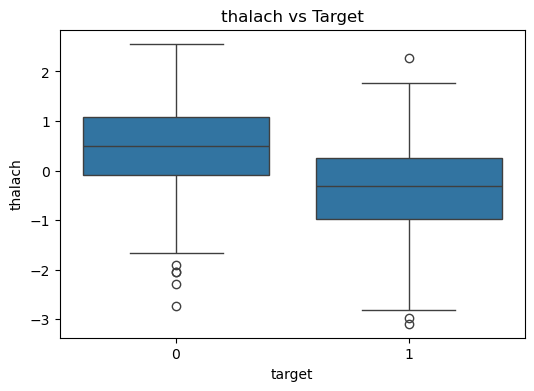

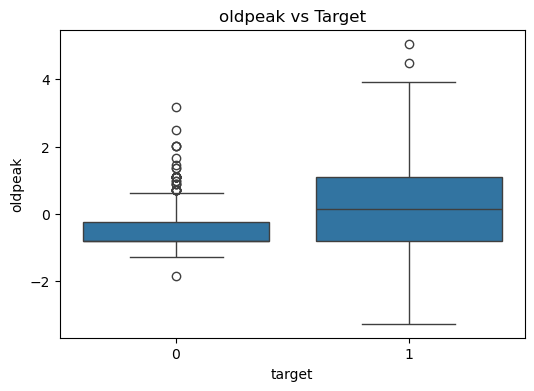

In [30]:
# Boxplots (numerical vs target)
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x="target", y=col, data=df)
    plt.title(f"{col} vs Target")
    plt.show()

In [31]:
# save the cleaned data
df.to_csv("../data/heart_disease_cleaned.csv", index=False)